### Cryptocurrency Price Trend Analysis and Trading Strategy Project Report | Arjun Mehta


Introduction:
Cryptocurrency trading has emerged as a popular avenue for investors and traders worldwide, offering opportunities for significant returns but also carrying inherent risks due to market volatility. Analyzing cryptocurrency price trends and developing effective trading strategies is essential for navigating these markets successfully.

Libraries Used:
- pandas: Used for data manipulation and analysis, enabling easy handling of the cryptocurrency price data.
- matplotlib.pyplot: Utilized for data visualization, allowing the creation of insightful graphs to visualize price trends and trading signals.

Financial Concepts:
1. Simple Moving Average (SMA): A technical analysis tool used to smooth out price data by calculating the average closing price over a specified period. SMAs are commonly used to identify trends and potential reversal points in financial markets.
2. SMA Crossover Strategy: A popular trading strategy that involves comparing two SMAs of different time periods (e.g., 50-day SMA and 200-day SMA). Buy signals are generated when the shorter-term SMA crosses above the longer-term SMA, indicating a bullish trend, while sell signals are generated when the shorter-term SMA crosses below the longer-term SMA, indicating a bearish trend.
3. Volume Analysis: The examination of trading volume, which represents the total number of shares or contracts traded during a specific period. Volume analysis helps traders assess the strength of price movements and confirm the validity rends.
"""


In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

# Load cryptocurrency data from CSV file into a DataFrame

crypto_data = pd.read_csv('XMR_All_graph_coinmarketcap1.csv')

In [2]:
# Convert 'timestamp' column to datetime format for better manipulation

crypto_data['timestamp'] = pd.to_datetime(crypto_data['timestamp'])


In [3]:
# Calculate daily price change and percentage change

crypto_data['price_change'] = crypto_data['close'] - crypto_data['open']
crypto_data['price_change_percentage'] = ((crypto_data['close'] - crypto_data['open']) / crypto_data['open']) * 100

# Calculate Simple Moving Averages (SMA) for 50 and 200 days

crypto_data['SMA_50'] = crypto_data['close'].rolling(window=50).mean()
crypto_data['SMA_200'] = crypto_data['close'].rolling(window=200).mean()


In [4]:
# Generate trading signals based on SMA crossovers

crypto_data['positions'] = 0
crypto_data['positions'][50:] = crypto_data['SMA_50'][50:] > crypto_data['SMA_200'][50:]

# Calculate positions based on signal changes

crypto_data['positions'] = crypto_data['positions'].diff()


C:\Users\arjun\AppData\Local\Temp\ipykernel_7304\2813039214.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  crypto_data['positions'][50:] = crypto_data['SMA_50'][50:] > crypto_data['SMA_200'][50:]
C:\Users\arjun\AppData\Local\Temp\ipyker

In [5]:
# Handle the first NaN value in positions

crypto_data['positions'].fillna(0, inplace=True)

C:\Users\arjun\AppData\Local\Temp\ipykernel_7304\1179865912.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crypto_data['positions'].fillna(0, inplace=True)
C:\Users\arjun\AppData\Local\Temp\ipykernel_7304\1179865912.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crypto_data['positions'].fillna(0, inpl

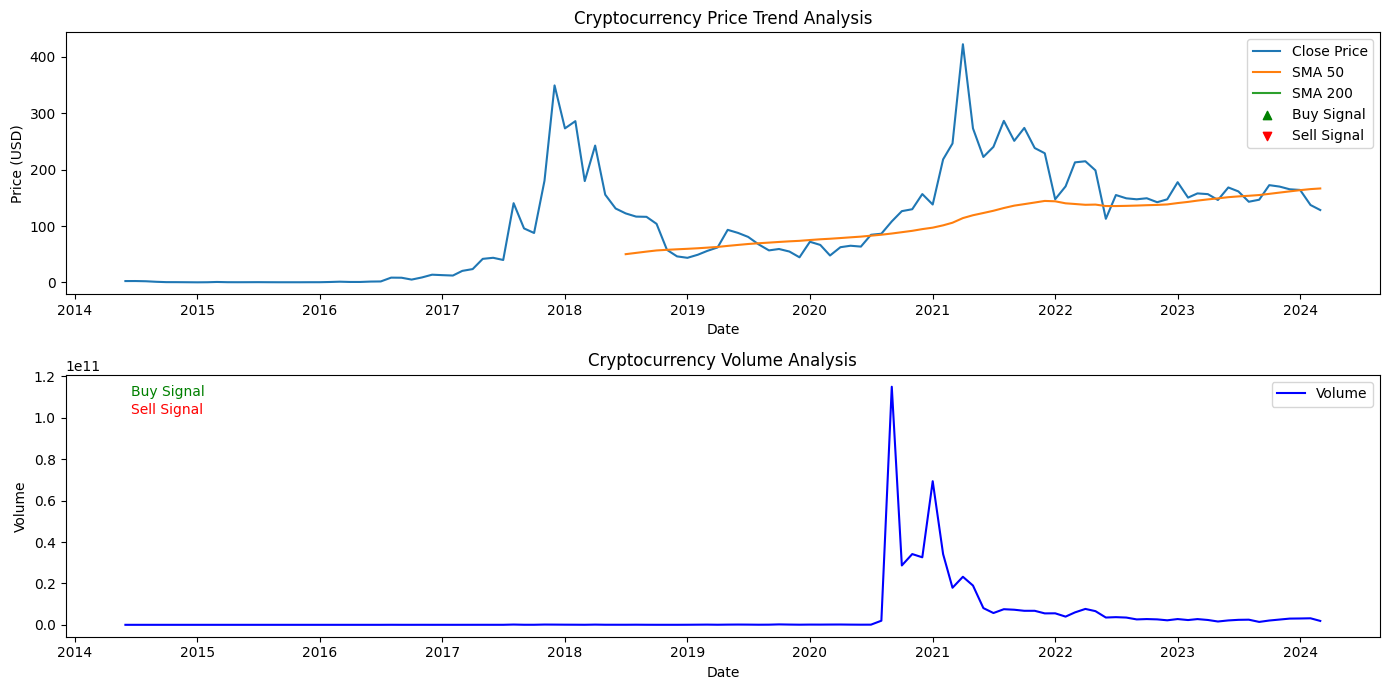

In [9]:
# Plotting price trends and trading signals

plt.figure(figsize=(14, 7))

# Price trend analysis subplot

plt.subplot(2, 1, 1)
plt.plot(crypto_data['timestamp'], crypto_data['close'], label='Close Price')
plt.plot(crypto_data['timestamp'], crypto_data['SMA_50'], label='SMA 50')
plt.plot(crypto_data['timestamp'], crypto_data['SMA_200'], label='SMA 200')

# Marking buy and sell signals

buy_dates = crypto_data['timestamp'][crypto_data['positions'] == 1]
sell_dates = crypto_data['timestamp'][crypto_data['positions'] == -1]
buy_prices = crypto_data['close'][crypto_data['positions'] == 1]
sell_prices = crypto_data['close'][crypto_data['positions'] == -1]

plt.scatter(buy_dates, buy_prices, marker='^', color='g', label='Buy Signal')
plt.scatter(sell_dates, sell_prices, marker='v', color='r', label='Sell Signal')

# Annotating buy and sell points

for i in range(len(buy_dates)):
    plt.text(buy_dates.iloc[i], buy_prices.iloc[i], f'Buy', fontsize=10, ha='center', va='bottom', color='black')

for i in range(len(sell_dates)):
    plt.text(sell_dates.iloc[i], sell_prices.iloc[i], f'Sell', fontsize=10, ha='center', va='top', color='black')

# Adding title, labels, and legend

plt.title('Cryptocurrency Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Volume analysis subplot

plt.subplot(2, 1, 2)
plt.plot(crypto_data['timestamp'], crypto_data['volume'], color='blue', label='Volume')
plt.title('Cryptocurrency Volume Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# Adding keys for Buy and Sell signals

plt.annotate('Buy Signal', xy=(0.05, 0.92), xycoords='axes fraction', color='g')
plt.annotate('Sell Signal', xy=(0.05, 0.85), xycoords='axes fraction', color='r')

# Adjusting layout

plt.tight_layout()

# Displaying plots

plt.show()